# MLE: Cross Entropy and KL Divergence Minimzation

### Maximum Likelihood Estimation (MLE)

Given a dataset $\{x_1, x_2, \dots, x_n\}$ drawn from an unknown distribution, the goal of MLE is to estimate the parameters $\theta$ of a probability distribution $p(x|\theta)$ such that the likelihood of the observed data is maximized.

The likelihood function is the joint probability of the observed data:

$$
L(\theta) = p(x_1, x_2, \dots, x_n | \theta) = \prod_{i=1}^{n} p(x_i | \theta)
$$

The **log-likelihood** is then:

$$
\log L(\theta) = \sum_{i=1}^{n} \log p(x_i | \theta)
$$

MLE finds $\theta$ by maximizing the log-likelihood:

$$
\hat{\theta} = \arg\max_{\theta} \log L(\theta)
$$


## Minimzing CE Loss & KL Divergence against data density estimate

In this notebook, we will show that minimizing the Cross Entropy (CE) loss and the Kullback-Leibler (KL) Divergence between the data distribution and the model distribution are equivalent to maximizing the log-likelihood of the data.

Let's consider a dataset $\{x_1, x_2, \dots, x_n\}$ drawn from an unknown distribution $p_{\text{data}}(x)$.

We want to estimate the parameters $\theta$ of a model distribution $p_{\text{model}}(x|\theta)$ such that the model distribution is as close as possible to the data distribution.

The data distribution is the crude estimate of the true distribution of the data. The model distribution is the distribution we are trying to learn.

For the dataset, the data density estimate is:

$$
\hat{p}_{\text{data}}(x) = \frac{1}{n} \sum_{i=1}^{n} \delta(x - x_i)
$$

where $\delta(x)$ is the Dirac delta function.

The CE loss between the data distribution and the model distribution is:

$$
\text{CE}(\theta) = - \mathbb{E}_{x \sim p_{\text{data}}(x)} \left[ \log p_{\text{model}}(x|\theta) \right]
$$

For fixed $\hat{p}_{\text{data}}(x)$, the CE loss is minimized when the model distribution is as close as possible to the data distribution.

Proof:

$$
\begin{aligned}
\text{CE}(\theta) &= - \mathbb{E}_{x \sim p_{\text{data}}(x)} \left[ \log p_{\text{model}}(x|\theta) \right] \\
&= - \int p_{\text{data}}(x) \log p_{\text{model}}(x|\theta) dx \\
&= - \int p_{\text{data}}(x) \log \left( \frac{p_{\text{model}}(x|\theta)}{p_{\text{data}}(x)} p_{\text{data}}(x) \right) dx \\
&= - \int p_{\text{data}}(x) \log \left( \frac{p_{\text{model}}(x|\theta)}{p_{\text{data}}(x)} \right) dx - \int p_{\text{data}}(x) \log p_{\text{data}}(x) dx \\
&= - \int p_{\text{data}}(x) \log \left( \frac{p_{\text{model}}(x|\theta)}{p_{\text{data}}(x)} \right) dx + \text{H}(\hat{p}_{\text{data}}(x)) \\
&= \text{KL}(\hat{p}_{\text{data}}(x) || p_{\text{model}}(x|\theta)) +\text{H}(\hat{p}_{\text{data}}(x))
\end{aligned}
$$

where $\text{H}(\hat{p}_{\text{data}}(x))$ is the entropy of the data distribution.

This is the sum of the KL Divergence between the data distribution and the model distribution and the entropy of the data distribution.

If we substitute the data density estimate $\hat{p}_{\text{data}}(x)$ with the true data distribution $p_{\text{data}}(x)$, then:

$$
\text{CE}(\theta) = \text{KL}(p_{\text{data}}(x) || p_{\text{model}}(x|\theta)) - \text{H}(p_{\text{data}}(x))
$$

Ignoring the entropy term, the CE loss is minimized when the KL Divergence between the data distribution and the model distribution is minimized.

Substituting $\hat{p}_{\text{data}}(x)$ with the true data distribution $p_{\text{data}}(x)$, and using the dirac delta function, the CE loss becomes:

$$
\text{CE}(\theta) = - \frac{1}{n} \sum_{i=1}^{n} \log p_{\text{model}}(x_i|\theta)
$$

because $p_{\text{data}}(x) = \frac{1}{n} \sum_{i=1}^{n} \delta(x - x_i)$ which gives:

$$
\begin{aligned}
\text{CE}(\theta) &= - \int p_{\text{data}}(x) \log p_{\text{model}}(x|\theta) dx \\
&= - \int \frac{1}{n} \sum_{i=1}^{n} \delta(x - x_i) \log p_{\text{model}}(x|\theta) dx \\
&= - \frac{1}{n} \sum_{i=1}^{n} \log p_{\text{model}}(x_i|\theta)
\end{aligned}
$$


So when we minimize the CE loss, we are maximizing the log-likelihood of the data, $\log L(\theta)$.

At the minimum of the CE loss, $\hat{\theta}$, CE($\hat{\theta}$) ( a constant away from $l = log(L(\hat{\theta})$)) the model distribution is as close as possible to the data distribution.



# Example MLE

In [3]:
!pip install -q yfinance

In [22]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.stats import norm, lognorm, gamma, entropy

# Download stock data
apple = yf.download('AAPL', start='2000-01-01', end='2023-01-01', interval='1mo')
microsoft = yf.download('MSFT', start='2000-01-01', end='2023-01-01', interval='1mo')

# Calculate log returns
apple['Log Return'] = np.log(apple['Adj Close'] / apple['Adj Close'].shift(1)).dropna()
microsoft['Log Return'] = np.log(microsoft['Adj Close'] / microsoft['Adj Close'].shift(1)).dropna()

# Calculate the difference in log returns
log_returns_diff = apple['Log Return'] - microsoft['Log Return']
returns_diff = np.exp(log_returns_diff) - 1


log_returns_diff.describe()

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


count    275.000000
mean       0.011071
std        0.111353
min       -0.715142
25%       -0.041518
50%        0.012564
75%        0.074213
max        0.330388
Name: Log Return, dtype: float64

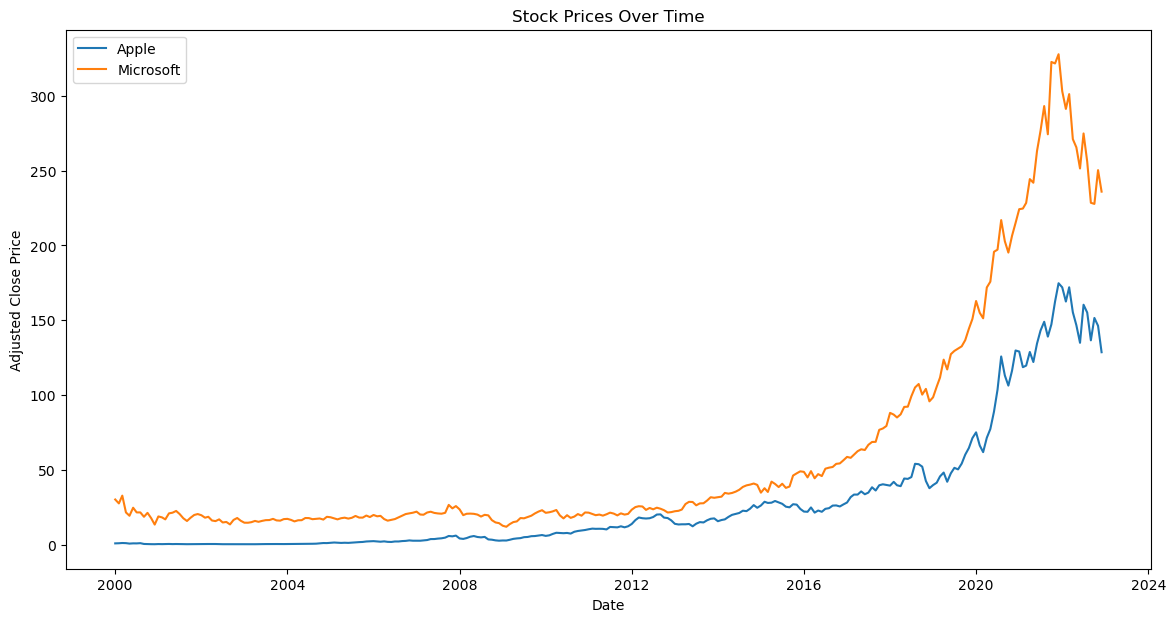

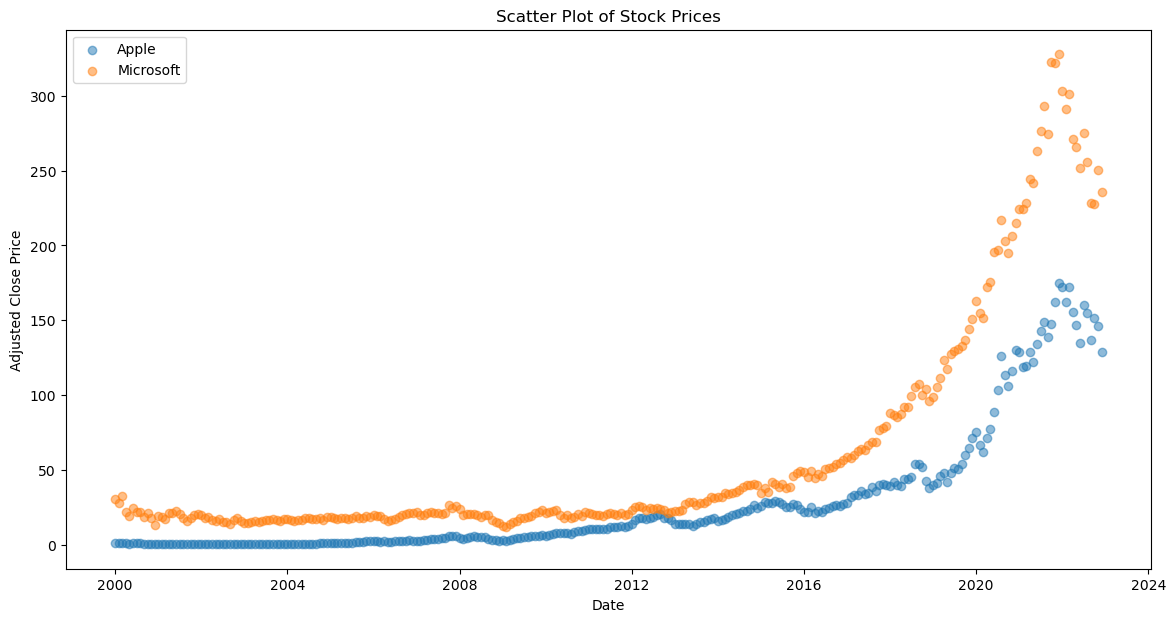

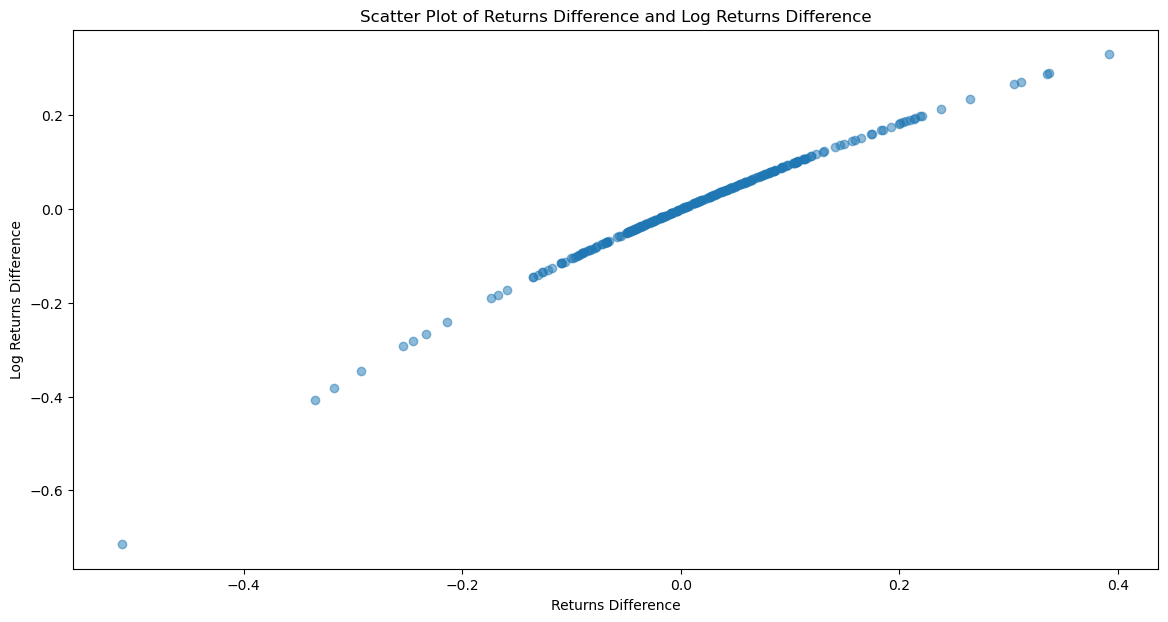

In [23]:
import matplotlib.pyplot as plt

# Plot stock prices over time
plt.figure(figsize=(14, 7))
plt.plot(apple.index, apple['Adj Close'], label='Apple')
plt.plot(microsoft.index, microsoft['Adj Close'], label='Microsoft')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Scatter plot of stock prices
plt.figure(figsize=(14, 7))
plt.scatter(apple.index, apple['Adj Close'], label='Apple', alpha=0.5)
plt.scatter(microsoft.index, microsoft['Adj Close'], label='Microsoft', alpha=0.5)
plt.title('Scatter Plot of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Scatter plot of returns_diff and log_returns_diff
plt.figure(figsize=(14, 7))
plt.scatter(returns_diff, log_returns_diff, alpha=0.5)
plt.title('Scatter Plot of Returns Difference and Log Returns Difference')
plt.xlabel('Returns Difference')
plt.ylabel('Log Returns Difference')
plt.show()

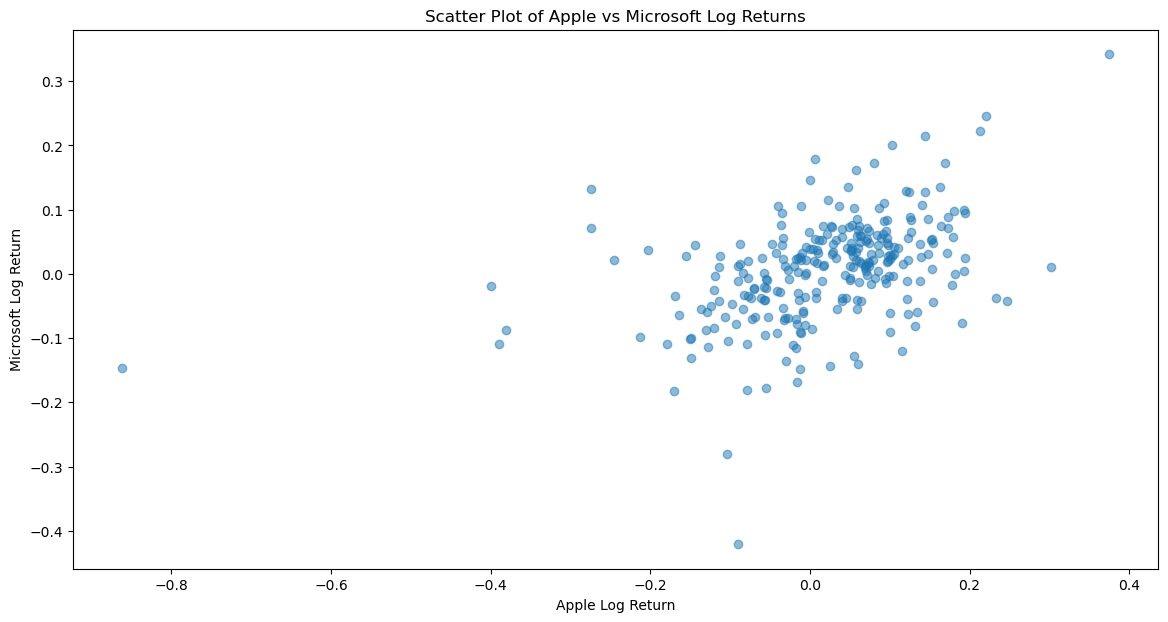

In [24]:
plt.figure(figsize=(14, 7))
plt.scatter(apple['Log Return'], microsoft['Log Return'], alpha=0.5)
plt.title('Scatter Plot of Apple vs Microsoft Log Returns')
plt.xlabel('Apple Log Return')
plt.ylabel('Microsoft Log Return')
plt.show()

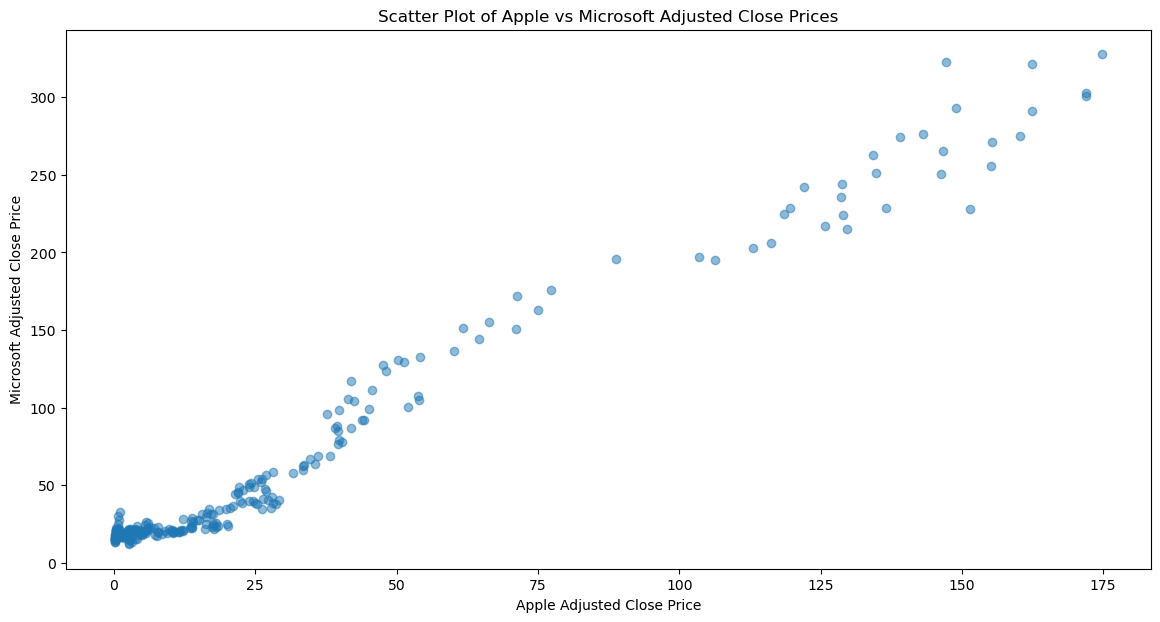

In [25]:
plt.figure(figsize=(14, 7))
plt.scatter(apple['Adj Close'], microsoft['Adj Close'], alpha=0.5)
plt.title('Scatter Plot of Apple vs Microsoft Adjusted Close Prices')
plt.xlabel('Apple Adjusted Close Price')
plt.ylabel('Microsoft Adjusted Close Price')
plt.show()

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


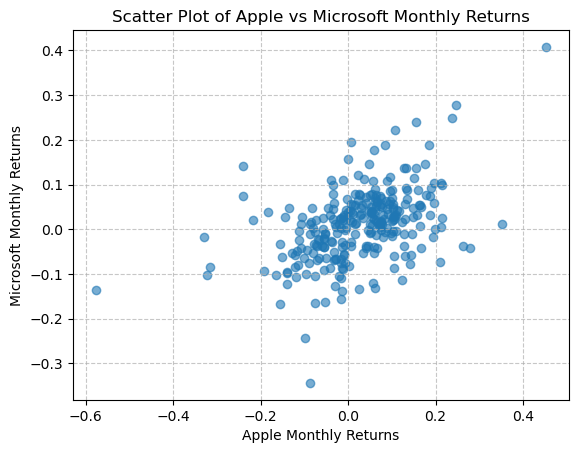

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Download stock data
apple = yf.download('AAPL', start='2000-01-01', end='2023-01-01', interval='1mo')
microsoft = yf.download('MSFT', start='2000-01-01', end='2023-01-01', interval='1mo')

# Calculate monthly returns
apple['Monthly Return'] = apple['Adj Close'].pct_change()
microsoft['Monthly Return'] = microsoft['Adj Close'].pct_change()

# Drop rows with NaN values in either column
returns = pd.DataFrame({
    'Apple': apple['Monthly Return'],
    'Microsoft': microsoft['Monthly Return']
}).dropna()

# Scatter plot
plt.scatter(returns['Apple'], returns['Microsoft'], alpha=0.6)
plt.title('Scatter Plot of Apple vs Microsoft Monthly Returns')
plt.xlabel('Apple Monthly Returns')
plt.ylabel('Microsoft Monthly Returns')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [16]:
# Calculate measures of dispersion
mean_diff = log_returns_diff.mean()
std_diff = log_returns_diff.std()
var_diff = log_returns_diff.var()
range_diff = log_returns_diff.max() - log_returns_diff.min()
iqr_diff = log_returns_diff.quantile(0.75) - log_returns_diff.quantile(0.25)

print(f"Mean: {mean_diff}")
print(f"Standard Deviation: {std_diff}")
print(f"Variance: {var_diff}")
print(f"Range: {range_diff}")
print(f"Interquartile Range (IQR): {iqr_diff}")

Mean: 0.01107119362440254
Standard Deviation: 0.1113526610798705
Variance: 0.012399415129568507
Range: 1.0455297431865285
Interquartile Range (IQR): 0.11573070462874716


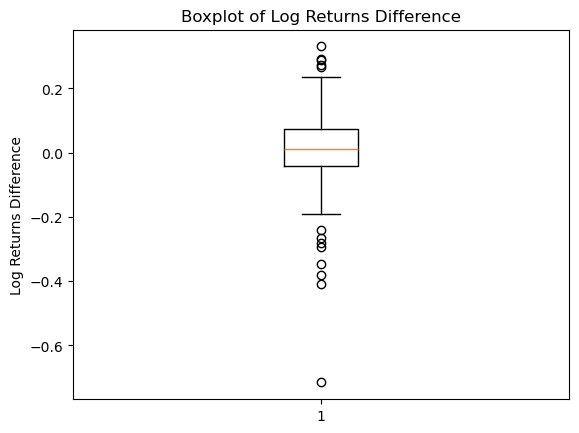

In [18]:
plt.boxplot(log_returns_diff.dropna())
plt.title('Boxplot of Log Returns Difference')
plt.ylabel('Log Returns Difference')
plt.show()

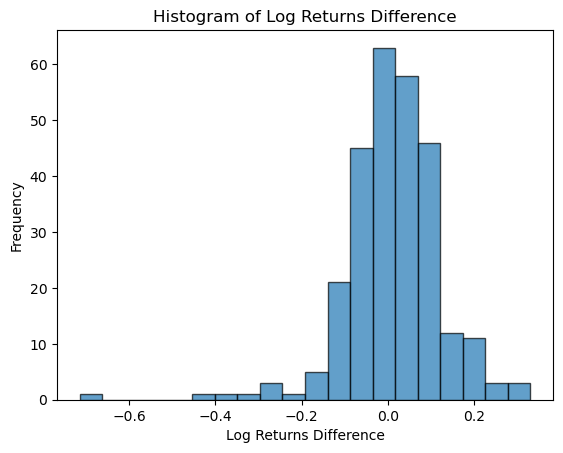

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of returns_diff
plt.hist(log_returns_diff.dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Log Returns Difference')
plt.xlabel('Log Returns Difference')
plt.ylabel('Frequency')
plt.show()

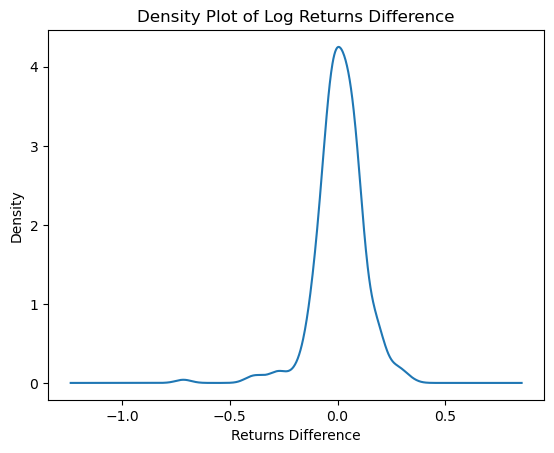

In [31]:
# Plot density of returns_diff
log_returns_diff.plot.kde()
plt.title('Density Plot of Log Returns Difference')
plt.xlabel('Returns Difference')
plt.ylabel('Density')
plt.show()

In [33]:
import numpy as np
from scipy.stats import norm, lognorm, gamma

# Ensure log_returns_diff is defined earlier in your code
shift = -log_returns_diff.min() + 1e-6  # Shift to make data strictly positive

# Fit normal distribution
norm_params = norm.fit(log_returns_diff.dropna())
norm_ce = -np.mean(norm.logpdf(log_returns_diff.dropna(), *norm_params))

# Fit log-normal distribution (on shifted data)
lognorm_params = lognorm.fit((log_returns_diff + shift).dropna(), floc=0)
lognorm_ce = -np.mean(lognorm.logpdf(log_returns_diff.dropna() + shift, *lognorm_params))

# Fit gamma distribution (on shifted data)
gamma_params = gamma.fit((log_returns_diff + shift).dropna(), floc=0)
gamma_ce = -np.mean(gamma.logpdf(log_returns_diff.dropna() + shift, *gamma_params))

print(f"Normal Distribution CE Loss: {norm_ce}")
print(f"Log-Normal Distribution CE Loss (accounting for shift): {lognorm_ce}")
print(f"Gamma Distribution CE Loss (accounting for shift): {gamma_ce}")

Normal Distribution CE Loss: -0.7779359496614896
Log-Normal Distribution CE Loss (accounting for shift): 0.8518231113047258
Gamma Distribution CE Loss (accounting for shift): -0.039120539281228627


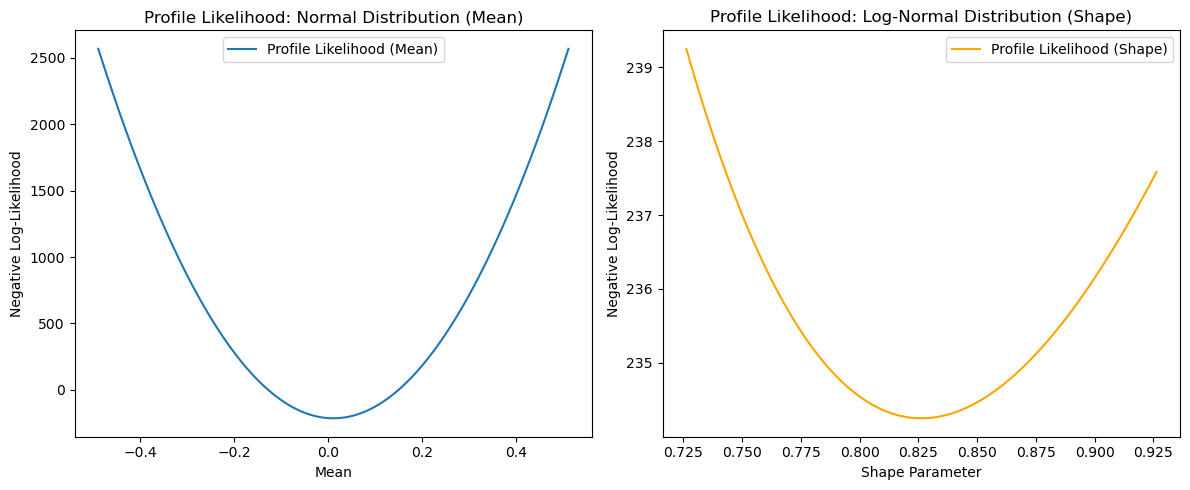

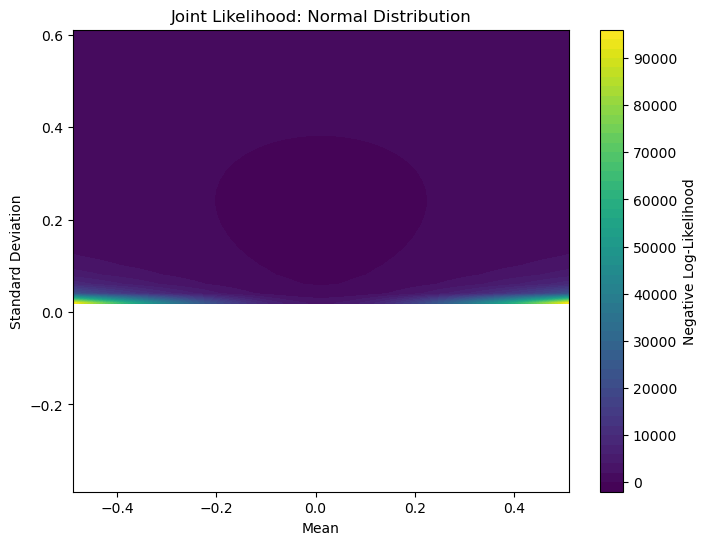

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, gamma

# Ensure log_returns_diff and shift are already defined
data = (log_returns_diff + shift).dropna()

# Fit parameters for each distribution
norm_params = norm.fit(log_returns_diff.dropna())
lognorm_params = lognorm.fit(data, floc=0)
gamma_params = gamma.fit(data, floc=0)

# Function to calculate negative log-likelihood
def calculate_nll(distribution, params, data):
    return -np.sum(distribution.logpdf(data, *params))

# Profile likelihood for Normal Distribution (vary mean)
mean_values = np.linspace(norm_params[0] - 0.5, norm_params[0] + 0.5, 100)
nll_mean = [calculate_nll(norm, (mu, norm_params[1]), log_returns_diff.dropna()) for mu in mean_values]

# Profile likelihood for Log-normal Distribution (vary shape parameter)
shape_values = np.linspace(lognorm_params[0] - 0.1, lognorm_params[0] + 0.1, 100)
nll_shape = [calculate_nll(lognorm, (shape, lognorm_params[1], lognorm_params[2]), data) for shape in shape_values]

# Joint likelihood for Normal Distribution (vary mean and stddev)
mean_grid, std_grid = np.meshgrid(
    np.linspace(norm_params[0] - 0.5, norm_params[0] + 0.5, 50),
    np.linspace(norm_params[1] - 0.5, norm_params[1] + 0.5, 50)
)
joint_nll = np.array([
    calculate_nll(norm, (mu, sigma), log_returns_diff.dropna())
    for mu, sigma in zip(mean_grid.ravel(), std_grid.ravel())
]).reshape(mean_grid.shape)

# Plot profile likelihoods
plt.figure(figsize=(12, 5))

# Normal distribution profile likelihood (mean)
plt.subplot(1, 2, 1)
plt.plot(mean_values, nll_mean, label="Profile Likelihood (Mean)")
plt.title("Profile Likelihood: Normal Distribution (Mean)")
plt.xlabel("Mean")
plt.ylabel("Negative Log-Likelihood")
plt.legend()

# Log-normal distribution profile likelihood (shape)
plt.subplot(1, 2, 2)
plt.plot(shape_values, nll_shape, label="Profile Likelihood (Shape)", color='orange')
plt.title("Profile Likelihood: Log-Normal Distribution (Shape)")
plt.xlabel("Shape Parameter")
plt.ylabel("Negative Log-Likelihood")
plt.legend()

plt.tight_layout()
plt.show()

# Plot joint likelihood for Normal Distribution
plt.figure(figsize=(8, 6))
plt.contourf(mean_grid, std_grid, joint_nll, levels=50, cmap="viridis")
plt.colorbar(label="Negative Log-Likelihood")
plt.title("Joint Likelihood: Normal Distribution")
plt.xlabel("Mean")
plt.ylabel("Standard Deviation")
plt.show()

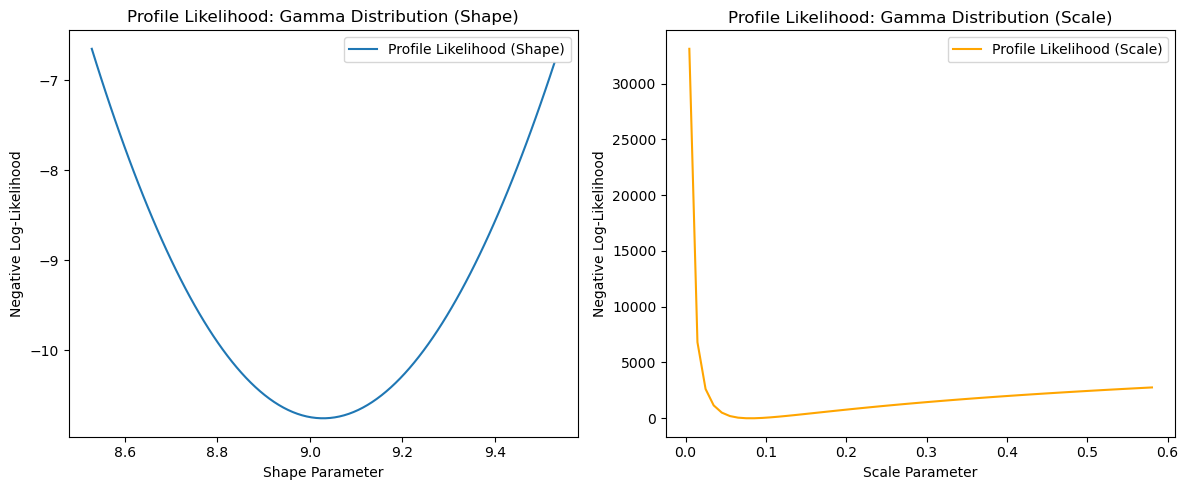

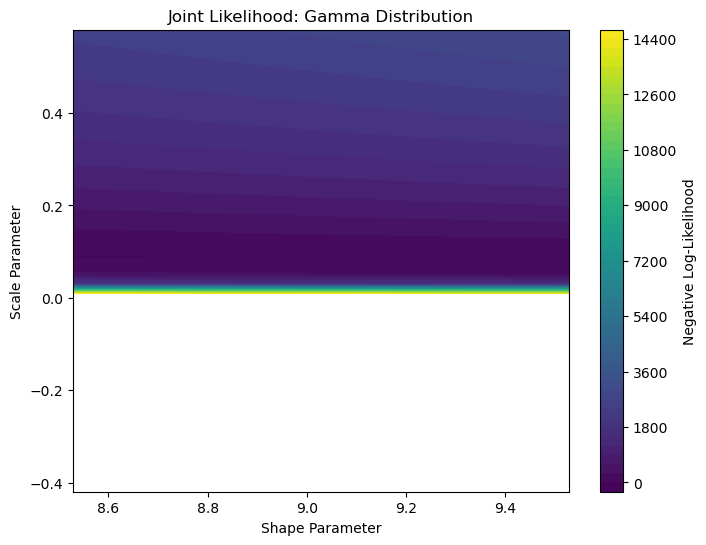

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Ensure log_returns_diff and shift are already defined
data = (log_returns_diff + shift).dropna()

# Fit parameters for Gamma Distribution
gamma_params = gamma.fit(data, floc=0)

# Function to calculate negative log-likelihood
def calculate_nll(distribution, params, data):
    return -np.sum(distribution.logpdf(data, *params))

# Profile likelihood for Gamma Distribution (vary shape parameter)
shape_values = np.linspace(gamma_params[0] - 0.5, gamma_params[0] + 0.5, 100)
nll_shape = [calculate_nll(gamma, (shape, gamma_params[1], gamma_params[2]), data) for shape in shape_values]

# Profile likelihood for Gamma Distribution (vary scale parameter)
scale_values = np.linspace(gamma_params[2] - 0.5, gamma_params[2] + 0.5, 100)
nll_scale = [calculate_nll(gamma, (gamma_params[0], gamma_params[1], scale), data) for scale in scale_values]

# Joint likelihood for Gamma Distribution (vary shape and scale)
shape_grid, scale_grid = np.meshgrid(
    np.linspace(gamma_params[0] - 0.5, gamma_params[0] + 0.5, 50),
    np.linspace(gamma_params[2] - 0.5, gamma_params[2] + 0.5, 50)
)
joint_nll_gamma = np.array([
    calculate_nll(gamma, (shape, gamma_params[1], scale), data)
    for shape, scale in zip(shape_grid.ravel(), scale_grid.ravel())
]).reshape(shape_grid.shape)

# Plot profile likelihoods for Gamma Distribution
plt.figure(figsize=(12, 5))

# Gamma distribution profile likelihood (shape)
plt.subplot(1, 2, 1)
plt.plot(shape_values, nll_shape, label="Profile Likelihood (Shape)")
plt.title("Profile Likelihood: Gamma Distribution (Shape)")
plt.xlabel("Shape Parameter")
plt.ylabel("Negative Log-Likelihood")
plt.legend()

# Gamma distribution profile likelihood (scale)
plt.subplot(1, 2, 2)
plt.plot(scale_values, nll_scale, label="Profile Likelihood (Scale)", color='orange')
plt.title("Profile Likelihood: Gamma Distribution (Scale)")
plt.xlabel("Scale Parameter")
plt.ylabel("Negative Log-Likelihood")
plt.legend()

plt.tight_layout()
plt.show()

# Plot joint likelihood for Gamma Distribution
plt.figure(figsize=(8, 6))
plt.contourf(shape_grid, scale_grid, joint_nll_gamma, levels=50, cmap="viridis")
plt.colorbar(label="Negative Log-Likelihood")
plt.title("Joint Likelihood: Gamma Distribution")
plt.xlabel("Shape Parameter")
plt.ylabel("Scale Parameter")
plt.show()